In [1]:
from hapi import*

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITR

In [2]:
db_begin('data')

Using data

H2O_13
                     Lines parsed: 170
H2O_07
                     Lines parsed: 585
H2O
                     Lines parsed: 585
CO2
                     Lines parsed: 129
H2O_14
                     Lines parsed: 251


In [3]:
#--- convert wavelengths to wavenumber
wl_start = 10.8e-6 #m
wl_end = 11.6e-6 #m

wn_start = round((1/wl_start)/100, 2) #cm-1
wn_end = round((1/wl_end)/100, 2) #cm-1

print('Wavenumbers from ' + str(wn_start) +' to '+ str(wn_end))

Wavenumbers from 925.93 to 862.07


In [4]:
#--- fetch(name of table with data, molecule number, isotopologue number, wavenumber start, wavenumber end)

fetch('H2O',1,1,wn_end,wn_start)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
Header written to data/H2O.header
END DOWNLOAD
                     Lines parsed: 251
PROCESSED


In [5]:
tableList()

dict_keys(['sampletab', 'H2O_13', 'H2O_07', 'H2O', 'CO2', 'H2O_14'])

In [6]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 862.070-925.930 wavenumber range
Number of rows: 251
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag       

In [7]:
mol_id=1
iso_id=1
abundance(mol_id,iso_id)

0.9973173

HITRAN units = True means that we are using cm2 molec-1. If this were set to False, we would be using cm-1. 

In [8]:
nu,coef = absorptionCoefficient_Lorentz(SourceTables='H2O', Environment={'T':217.,'p':0.100666}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
print(max(coef))

{'self': 1.0}
0.104869 seconds elapsed for abscoef; nlines = 251
5.804861591771796e-23


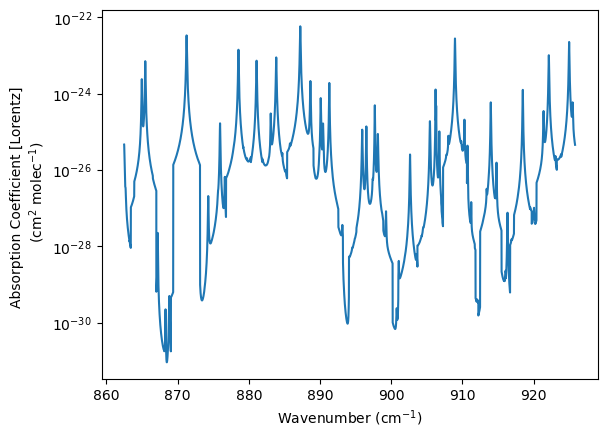

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.semilogy(nu,coef)
ax.set_xlabel('Wavenumber (cm$^{-1}$)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

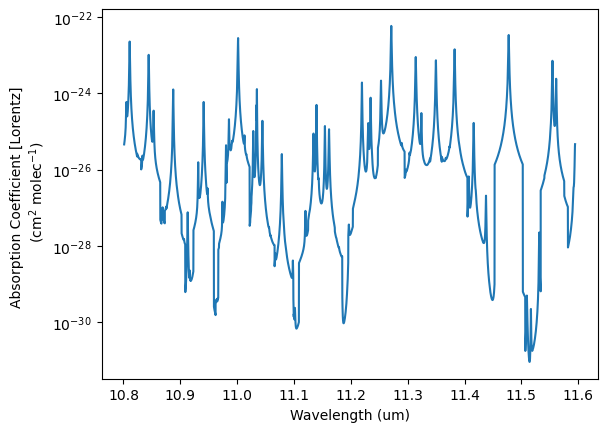

In [14]:
wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots()
ax.semilogy(wl,coef)
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
plt.show()

{'self': 1.0}
0.244125 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.066335 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.097962 seconds elapsed for abscoef; nlines = 251


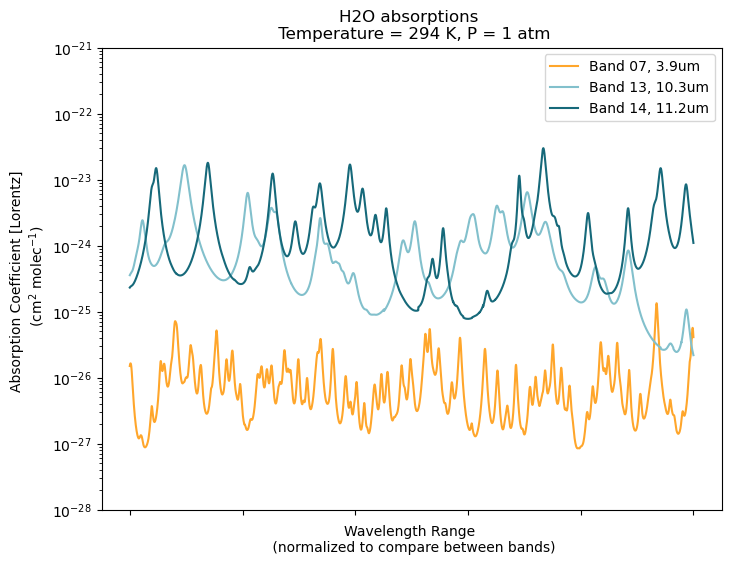

In [21]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=True)

nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-29, 10e-22])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{2}$ molec$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()

Converting the cm2 molec-1 to m2 kg-1:
* written out in Miller Time notes

In [38]:
#--- mass of water
m_water = 18.01528/1000 #kg mole-1
#--- mole
molec_mole = 6.022e23 #molec mole-1
#--- kg molec-1
kg_molec = m_water*(1/molec_mole)

print(kg_molec)

2.991577548987048e-26


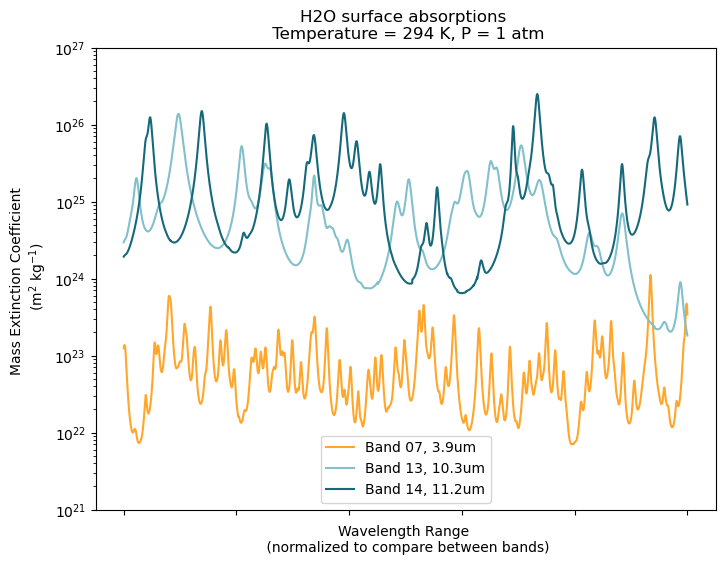

In [39]:
#--- convert cm2/molec to m2/kg
mass_ext_07 = (coef_07*100**2)/kg_molec
mass_ext_13 = (coef_13*100**2)/kg_molec
mass_ext_14 = (coef_14*100**2)/kg_molec

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,mass_ext_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,mass_ext_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,mass_ext_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e20, 10e26])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Mass Extinction Coefficient \n (m$^{2}$ kg$^{-1}$)')
ax.set_title('H2O surface absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()


Using the 1/cm units instead:

{'self': 1.0}
0.244775 seconds elapsed for abscoef; nlines = 585
{'self': 1.0}
0.071994 seconds elapsed for abscoef; nlines = 170
{'self': 1.0}
0.099636 seconds elapsed for abscoef; nlines = 251


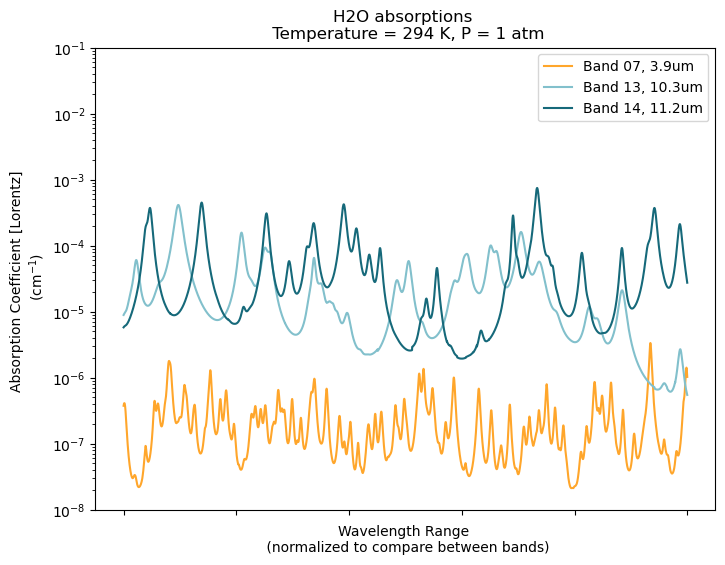

In [32]:
#--- Using surface-level temperature and pressure

nu_07,coef_07 = absorptionCoefficient_Lorentz(SourceTables='H2O_07', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_13,coef_13 = absorptionCoefficient_Lorentz(SourceTables='H2O_13', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)
nu_14,coef_14 = absorptionCoefficient_Lorentz(SourceTables='H2O_14', Environment={'T':294.,'p':1}, Diluent={'self':1.0}, WavenumberStep=0.001, HITRAN_units=False)

nu_07_norm = (nu_07 - np.min(nu_07)) / (np.max(nu_07) - np.min(nu_07))
nu_13_norm = (nu_13 - np.min(nu_13)) / (np.max(nu_13) - np.min(nu_13))
nu_14_norm = (nu_14 - np.min(nu_14)) / (np.max(nu_14) - np.min(nu_14))


wl = (1/nu)/100*1e6 #m

fig, ax = plt.subplots(1, figsize=(8,6))
ax.semilogy(nu_07_norm,coef_07, label='Band 07, 3.9um', c='#FFA62B')
ax.semilogy(nu_13_norm,coef_13, label='Band 13, 10.3um', c='#82C0CC')
ax.semilogy(nu_14_norm,coef_14, label='Band 14, 11.2um', c='#16697A')
ax.legend()
ax.set_xticklabels([]) 
ax.set_ylim([10e-9, 10e-2])
ax.set_xlabel('Wavelength Range \n (normalized to compare between bands)')
ax.set_ylabel('Absorption Coefficient [Lorentz] \n (cm$^{-1}$)')
ax.set_title('H2O absorptions \n Temperature = 294 K, P = 1 atm')
plt.show()